In [ ]:

import matplotlib as mpl
import matplotlib.pyplot as plt

import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import matplotlib.patches as patches
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.axes as maxes

import seaborn as sns

def modify_rc():
    mpl.rcParams['figure.dpi'] = 250
    mpl.rc('text', usetex=True)
    mpl.rc('text.latex', preamble=r'''\usepackage{bm}
\usepackage{xcolor}
\usepackage{mathrsfs, amsmath, amssymb, amsthm, amsxtra}''')
    #mpl.rcParams['text.latex.preamble']=[r"\usepackage{bm}", r"\usepackage{xcolor}"]
    mpl.rc('font', family='serif', serif='Computer Modern', size=8)

modify_rc()
modify_rc()

def pretty_axes(axx):
    axx.yaxis.set_ticks_position('both')
    axx.xaxis.set_ticks_position('both')
    axx.tick_params(axis='y', direction='in')
    axx.tick_params(axis='y', direction='in', which='minor')
    axx.tick_params(axis='x', direction='in')
    axx.tick_params(axis='x', direction='in', which='minor')
    axx.grid(linestyle=':', alpha=0.3, linewidth=0.5, color='gray')

# import healpy as hp
from astropy.io import fits
from astropy.wcs import WCS
# import astropy.units as u
from astropy.coordinates import SkyCoord
from astropy.nddata import Cutout2D
from reproject import reproject_interp
from astropy.wcs.utils import skycoord_to_pixel
from scipy.ndimage import map_coordinates

import healpy as hp

import cmasher as cmr

import utils



[pop-os:37794] shmem: mmap: an error occurred while determining whether or not /tmp/ompi.pop-os.1000/jf.0/1966669824/shared_mem_cuda_pool.pop-os could be created.
[pop-os:37794] create_and_attach: unable to create shared memory BTL coordinating structure :: size 134217728 


In [2]:
import pysm3 as sm
import pysm3.units as u

In [3]:
NSIDE = 512
print(3*NSIDE - 1)

1535


In [4]:
sky11 = sm.Sky(nside=NSIDE, preset_strings=['d11'])
iqu11 = sky11.components[0].f_real
# IQU11 = sm.utils.log_pol_tens_to_map(iqu11)

/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[i] = almi
No physical unit associated with file /home/m/.astropy/cache/download/url/5eef745c2c721c70901c600cc4f1ba27/contents
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[i] = almi


generating monofractal field


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(cl, dtype=np.float64) if cl is not None else None)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:563: ComplexWarning: Casting complex values to real discards the imaginary part
  cls_list = [np.asarray(cls, dtype=np.float64)]


In [61]:
eb11 = utils.QU_to_EB(iqu11[1], iqu11[2], NSIDE)

In [5]:

Hs = [0.01, 0.1, 0.25, 0.5, 0.75]
ts = []
ebs = []
for H in Hs:
    model = sm.ModifiedBlackBodyRealization(
        "dust_gnilc/raw/gnilc_dust_largescale_template_logpoltens_alm_nside2048_lmax1024_complex64.fits.gz",
        "353 GHz",
        "dust_gnilc/raw/gnilc_dust_temperature_modulation_alms_lmax768.fits.gz",
        "dust_gnilc/raw/gnilc_dust_polarization_modulation_alms_lmax768.fits.gz",
        "dust_gnilc/raw/gnilc_dust_small_scales_logpoltens_cl_lmax16384.fits.gz",
        "dust_gnilc/raw/gnilc_dust_largescale_template_beta_alm_nside2048_lmax1024.fits.gz",
        "dust_gnilc/raw/gnilc_dust_small_scales_beta_cl_lmax16384_2023.06.06.fits.gz",
        "dust_gnilc/raw/gnilc_dust_largescale_template_Td_alm_nside2048_lmax1024.fits.gz",
        "dust_gnilc/raw/gnilc_dust_small_scales_Td_cl_lmax16384_2023.06.06.fits.gz",
        NSIDE,
        8192,
        None,
        None,
        [1,2,3],
        None,
        True,
        lamb=H,
        Lplus=100.0,
        Hplus=0.5,
    )   
    iqu = model.f_real
    # IQU = sm.utils.log_pol_tens_to_map(iqu)
    ts.append(iqu[0])
    eb = utils.QU_to_EB(iqu[1], iqu[2], NSIDE)
    ebs.append(eb)

    # I.append(utils.make_hist(IQU[0], density=True, bin_num=50, range=ranges2[0]))
    # Q.append(utils.make_hist(IQU[1], density=True, bin_num=50, range=ranges2[1]))
    # U.append(utils.make_hist(IQU[2], density=True, bin_num=50, range=ranges2[2]))


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[i] = almi
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[i] = almi
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/pysm3/models/dust_realization.py:192: RuntimeWarning: invalid value encountered in divide
  phi_w = self.draw_corr_gauss_realization(Cl/Cl[0], self.nside, seeds[0], normalize=False)


generating multifractal field


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(cl, dtype=np.float64) if cl is not None else None)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/pysm3/models/dust_realization.py:220: ComplexWarning: Casting complex values to real discards the imaginary part
  f_real[i] = np.sqrt(var2) * f_real[i] / np.sqrt(curr_var)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:563: ComplexWarning: Casting complex values to real discards the imaginary part
  cls_list = [np.asarray(cls, dtype=np.float64)]
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[

generating multifractal field


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(cl, dtype=np.float64) if cl is not None else None)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/pysm3/models/dust_realization.py:220: ComplexWarning: Casting complex values to real discards the imaginary part
  f_real[i] = np.sqrt(var2) * f_real[i] / np.sqrt(curr_var)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:563: ComplexWarning: Casting complex values to real discards the imaginary part
  cls_list = [np.asarray(cls, dtype=np.float64)]
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[

generating multifractal field


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(cl, dtype=np.float64) if cl is not None else None)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/pysm3/models/dust_realization.py:220: ComplexWarning: Casting complex values to real discards the imaginary part
  f_real[i] = np.sqrt(var2) * f_real[i] / np.sqrt(curr_var)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:563: ComplexWarning: Casting complex values to real discards the imaginary part
  cls_list = [np.asarray(cls, dtype=np.float64)]
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[

generating multifractal field


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(cl, dtype=np.float64) if cl is not None else None)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/pysm3/models/dust_realization.py:220: ComplexWarning: Casting complex values to real discards the imaginary part
  f_real[i] = np.sqrt(var2) * f_real[i] / np.sqrt(curr_var)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:563: ComplexWarning: Casting complex values to real discards the imaginary part
  cls_list = [np.asarray(cls, dtype=np.float64)]
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:643: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.real[i] = almr
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/fitsfunc.py:644: ComplexWarning: Casting complex values to real discards the imaginary part
  alm.imag[

generating multifractal field


/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:607: ComplexWarning: Casting complex values to real discards the imaginary part
  (np.asarray(cl, dtype=np.float64) if cl is not None else None)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/pysm3/models/dust_realization.py:220: ComplexWarning: Casting complex values to real discards the imaginary part
  f_real[i] = np.sqrt(var2) * f_real[i] / np.sqrt(curr_var)
/home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/healpy/sphtfunc.py:563: ComplexWarning: Casting complex values to real discards the imaginary part
  cls_list = [np.asarray(cls, dtype=np.float64)]


(90.0, 1535)

/usr/local/texlive/2024/bin/x86_64-linux/luatex --luaonly /home/m/anaconda3/envs/pysm/lib/python3.12/site-packages/matplotlib/mpl-data/kpsewhich.lua


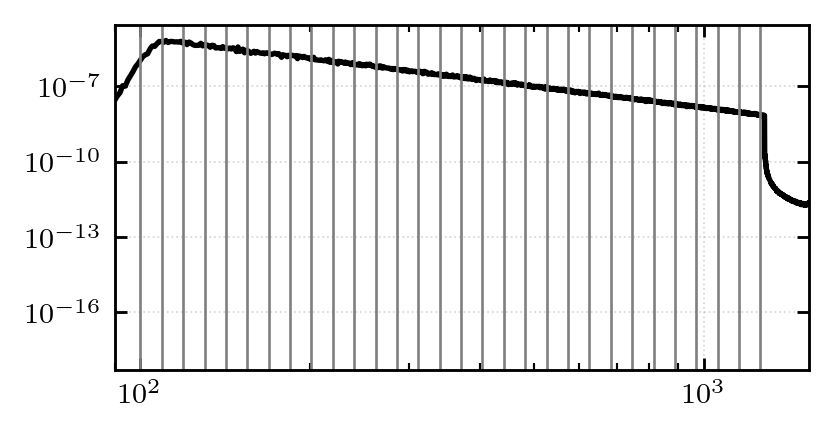

In [6]:
Cl = hp.anafast(ts[0])
ell = np.arange(len(Cl))
fig, ax = plt.subplots(1, 1, figsize=(3.5, 1.75), dpi=256)
ax.loglog(ell, Cl, color='black')

filters_ell = 10**np.linspace(2, 3.1, 30)
for _ell in filters_ell:
    ax.axvline(_ell, linestyle='-', color='gray', linewidth=0.75)

pretty_axes(ax)
ax.set_xlim((9e1, 3*NSIDE-1))

In [7]:
LMAX = 3*NSIDE - 1
print(LMAX)
filters_fwhm = [
    (180./float(s)*u.degree).to_value(u.rad) for s in filters_ell
]
print(filters_fwhm)

1535
[0.031415926535897934, 0.028788486827506718, 0.0263807904207604, 0.024174459303610323, 0.022152652490731072, 0.020299937475822004, 0.01860217243486778, 0.017046398281211596, 0.015620739748494794, 0.014314314746426438, 0.013117151297492502, 0.012020111420580857, 0.011014821380523213, 0.010093607771147293, 0.009249438943959137, 0.008475871335379175, 0.007767000282846533, 0.007117414954369343, 0.006522157047497206, 0.005976682942464009, 0.005476829020614827, 0.005018779883391719, 0.004599039229292894, 0.004214403166508451, 0.003861935757527181, 0.003538946609045816, 0.003242970336123912, 0.0029717477438336495, 0.0027232085827635978, 0.0024954557467487507]


In [8]:
def make_sf(field, filters):
    sfs = []
    for i, fwhm in enumerate(filters):
        sf_field = field - hp.smoothing(field, sigma=fwhm)
        sfs.append(sf_field)
    return sfs

In [9]:
t_sfs = []
t_sfs.append(make_sf(iqu11[0], filters_fwhm))
for t in ts:
    t_sfs.append(make_sf(t, filters_fwhm))

In [13]:
def make_mom(sfs, p=2, norm=1.):
    _sfs = sfs - (np.nanmean(sfs, axis=1).reshape(-1, 1))
    if norm is None:
        norm = np.nanmean(_sfs**2, axis=1)**(p/2.)
    return np.nanmean(_sfs**p, axis=1)/norm

In [18]:
t_moms = []
for i, t in enumerate(t_sfs):
    t_moms.append([make_mom(t, p=3, norm=None), make_mom(t, p=4, norm=None), make_mom(t, p=5, norm=None), make_mom(t, p=6, norm=None)])

<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:57: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:57: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_37794/4187856772.py:56: SyntaxWarning: invalid escape sequence '\m'
  ax[2].text(0.1, 0.8, '$5^{\mathrm{th}}$ moment', transform=ax[2].transAxes)
/tmp/ipykernel_37794/4187856772.py:57: SyntaxWarning: invalid escape sequence '\m'
  ax[3].text(0.1, 0.8, '$6^{\mathrm{th}}$ moment', transform=ax[3].transAxes)


[0 1 2 3 4 5 6]
[0.5 1.5 2.5 3.5 4.5 5.5]
[0.0, 0.01, 0.1, 0.25, 0.5, 0.75]


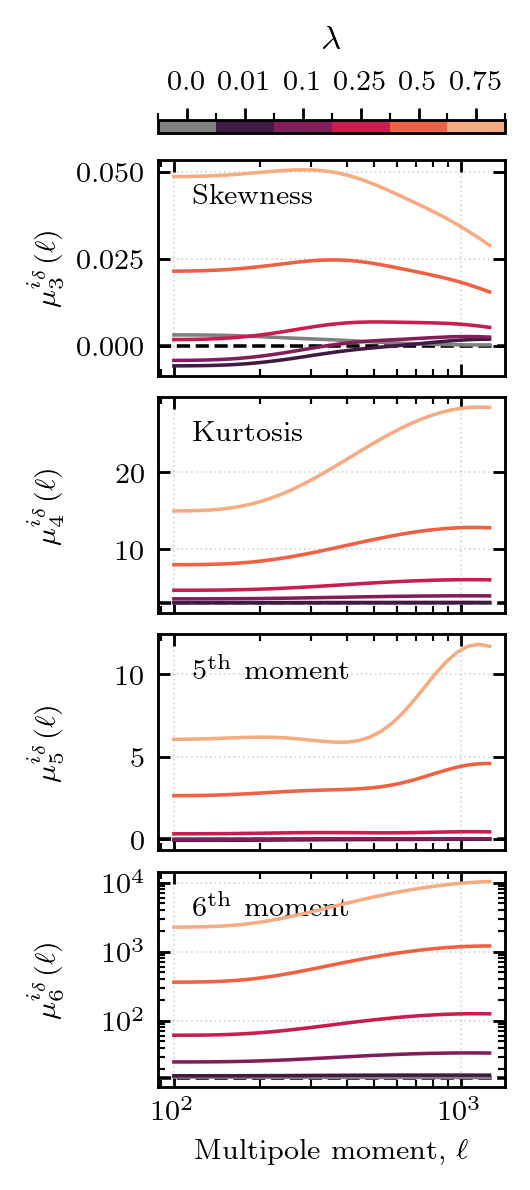

In [59]:

fig, ax = plt.subplots(4, 1, figsize=(1.75, 1.75*3.), dpi=256)

cols = sns.color_palette('rocket', len(t_moms)-1)
from matplotlib.colors import ListedColormap, BoundaryNorm
colours = [(0.5, 0.5, 0.5)] + cols
cmap2 = ListedColormap(colours)

for i, t in enumerate(t_moms):
    ax[0].plot(filters_ell, t[0], linestyle='-', color=colours[i], linewidth=1., zorder=5)
    ax[1].plot(filters_ell, t[1], linestyle='-', color=colours[i], linewidth=1., zorder=5)
    ax[2].plot(filters_ell, t[2], linestyle='-', color=colours[i], linewidth=1., zorder=5)
    ax[3].plot(filters_ell, t[3], linestyle='-', color=colours[i], linewidth=1., zorder=5)

for axx in ax:
    pretty_axes(axx)
    axx.set_xscale('log')
    # axx.loglog()

ax[0].axhline(0., linestyle='--', color='black', linewidth=1., zorder=3)
ax[1].axhline(3., linestyle='--', color='black', linewidth=1., zorder=3)
ax[2].axhline(0., linestyle='--', color='black', linewidth=1., zorder=3)
ax[3].axhline(15., linestyle='--', color='black', linewidth=1., zorder=3)
ax[3].set_yscale('log')

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_xticklabels([])

from matplotlib.colors import ListedColormap, BoundaryNorm
# colours = [(0.5, 0.5, 0.5)] + cols
cmap2 = ListedColormap(colours)

bounds = np.arange(len(colours) + 1)
print(bounds)
norm = BoundaryNorm(bounds, ncolors=len(colours))
im = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.125, 0.82, 0.775, 0.01])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
centers = 0.5 + np.arange(len(colours))
print(centers)
cbar.set_ticks(centers)
print([0.,] + Hs)
cbar.set_ticklabels([0.,] + Hs)
cbar.ax.xaxis.set_ticks_position('top')
cbar_ax.set_title(r'$\lambda$')

ax[0].set_ylabel(r'$\mu^{i_\delta}_{3}(\ell)$')
ax[1].set_ylabel(r'$\mu^{i_\delta}_{4}(\ell)$')
ax[2].set_ylabel(r'$\mu^{i_\delta}_{5}(\ell)$')
ax[3].set_ylabel(r'$\mu^{i_\delta}_{6}(\ell)$')
ax[3].set_xlabel(r'Multipole moment, $\ell$')

ax[0].text(0.1, 0.8, 'Skewness', transform=ax[0].transAxes)
ax[1].text(0.1, 0.8, 'Kurtosis', transform=ax[1].transAxes)
ax[2].text(0.1, 0.8, '$5^{\mathrm{th}}$ moment', transform=ax[2].transAxes)
ax[3].text(0.1, 0.8, '$6^{\mathrm{th}}$ moment', transform=ax[3].transAxes)

fig.align_ylabels()

fig.subplots_adjust(hspace=0.1)

fig.savefig('idelta_stat_moment.png', pad_inches=0.1, bbox_inches='tight')


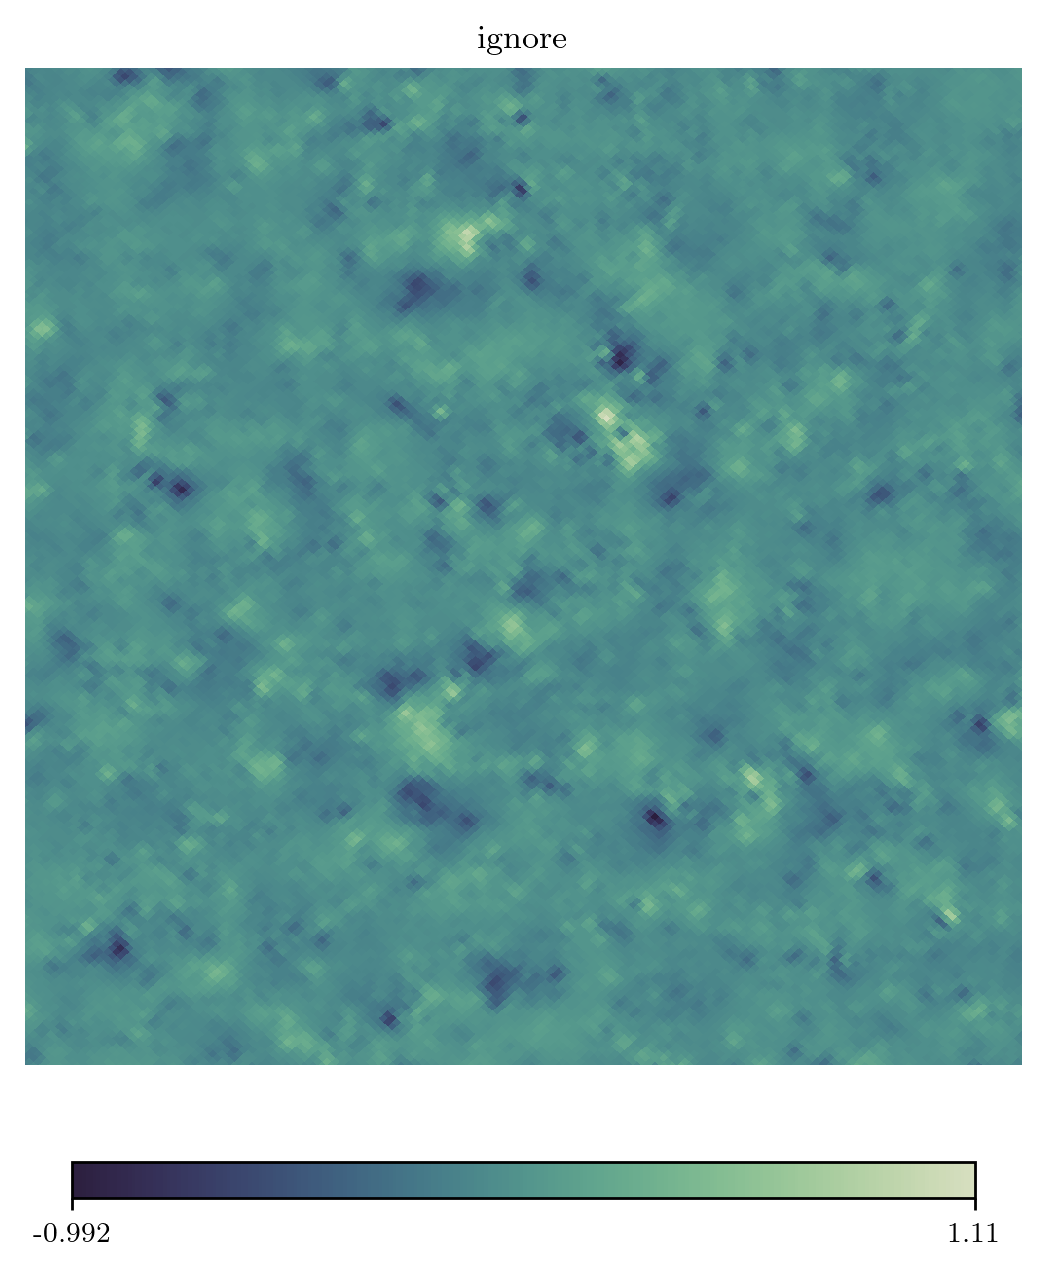

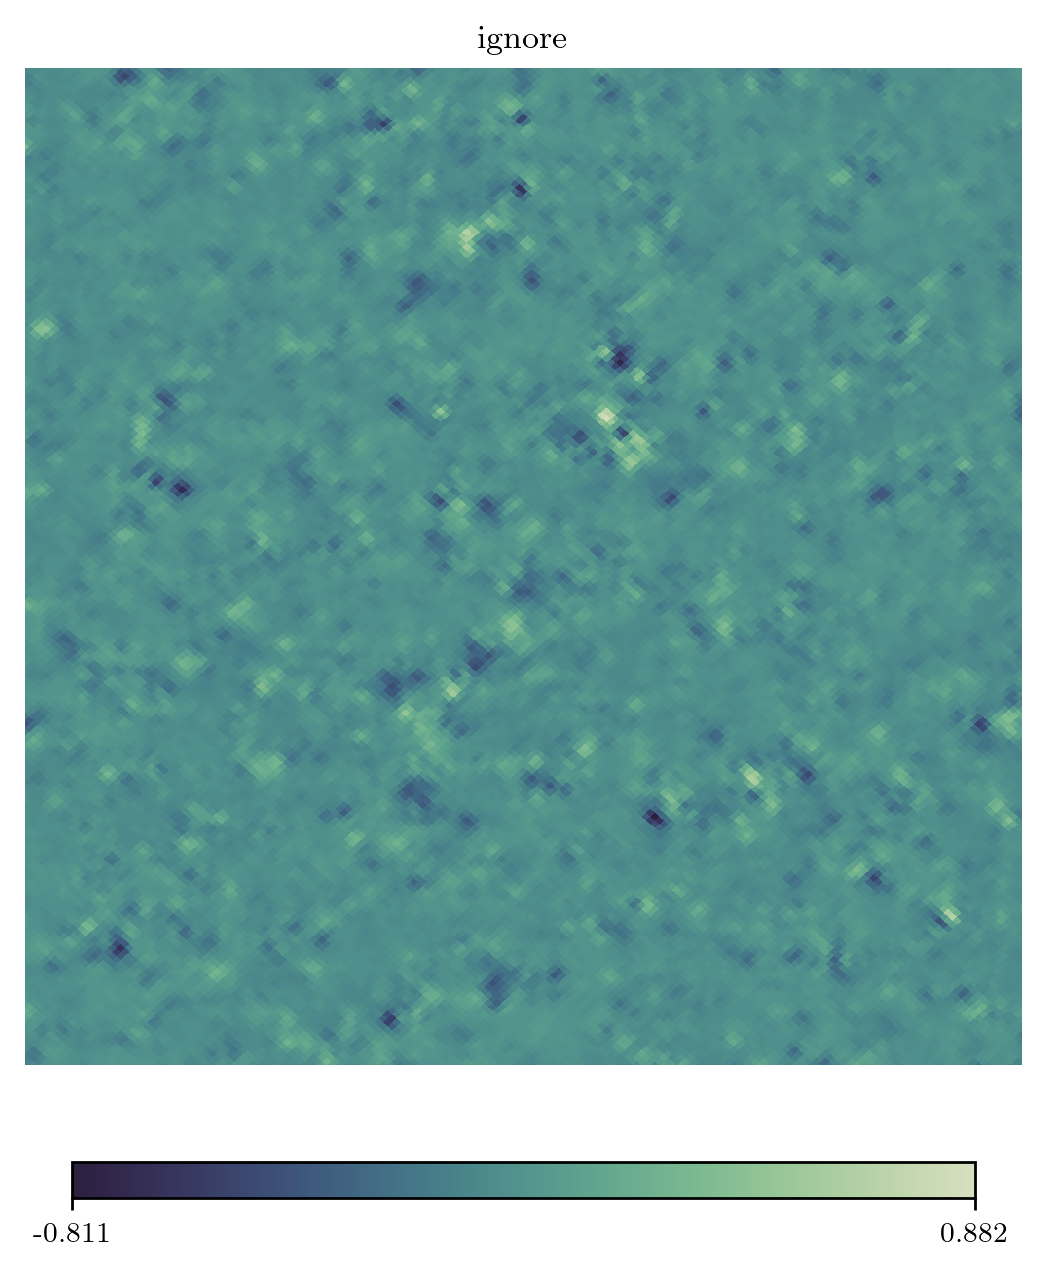

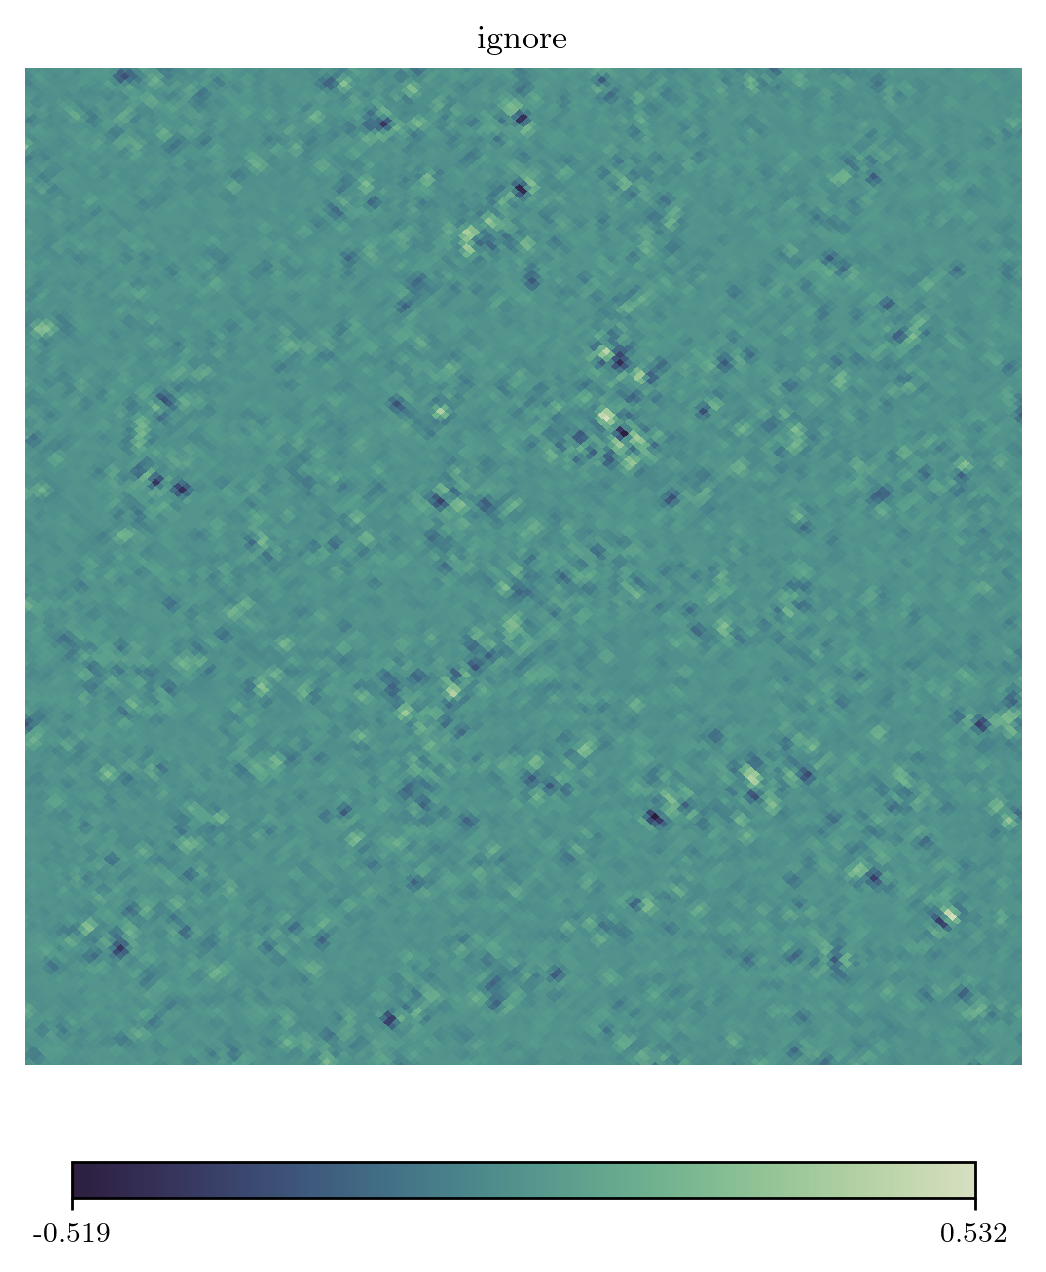

In [82]:
im1 = hp.cartview(t_sfs[-1][0], cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True, reverse=True), title=r'ignore', xsize=1024, return_projected_map=True, lonra=[170,190], latra=[-20,0])
im2 = hp.cartview(t_sfs[-1][18], cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True, reverse=True), title=r'ignore', xsize=1024, return_projected_map=True, lonra=[170,190], latra=[-20,0])
im3 = hp.cartview(t_sfs[-1][-2], cmap=sns.cubehelix_palette(start=.5, rot=-.75, as_cmap=True, reverse=True), title=r'ignore', xsize=1024, return_projected_map=True, lonra=[170,190], latra=[-20,0])

<>:28: SyntaxWarning: invalid escape sequence '\e'
<>:29: SyntaxWarning: invalid escape sequence '\e'
<>:30: SyntaxWarning: invalid escape sequence '\e'
<>:28: SyntaxWarning: invalid escape sequence '\e'
<>:29: SyntaxWarning: invalid escape sequence '\e'
<>:30: SyntaxWarning: invalid escape sequence '\e'
/tmp/ipykernel_37794/1345593837.py:28: SyntaxWarning: invalid escape sequence '\e'
  ax[0].text(0.05, 0.05, '$\ell >= %s$' % filters_ell[0], transform=ax[0].transAxes, color='black')
/tmp/ipykernel_37794/1345593837.py:29: SyntaxWarning: invalid escape sequence '\e'
  ax[1].text(0.05, 0.05, '$\ell >= %s$' % filters_ell[18], transform=ax[1].transAxes, color='black')
/tmp/ipykernel_37794/1345593837.py:30: SyntaxWarning: invalid escape sequence '\e'
  ax[2].text(0.05, 0.05, '$\ell >= %s$' % filters_ell[-2], transform=ax[2].transAxes, color='black')


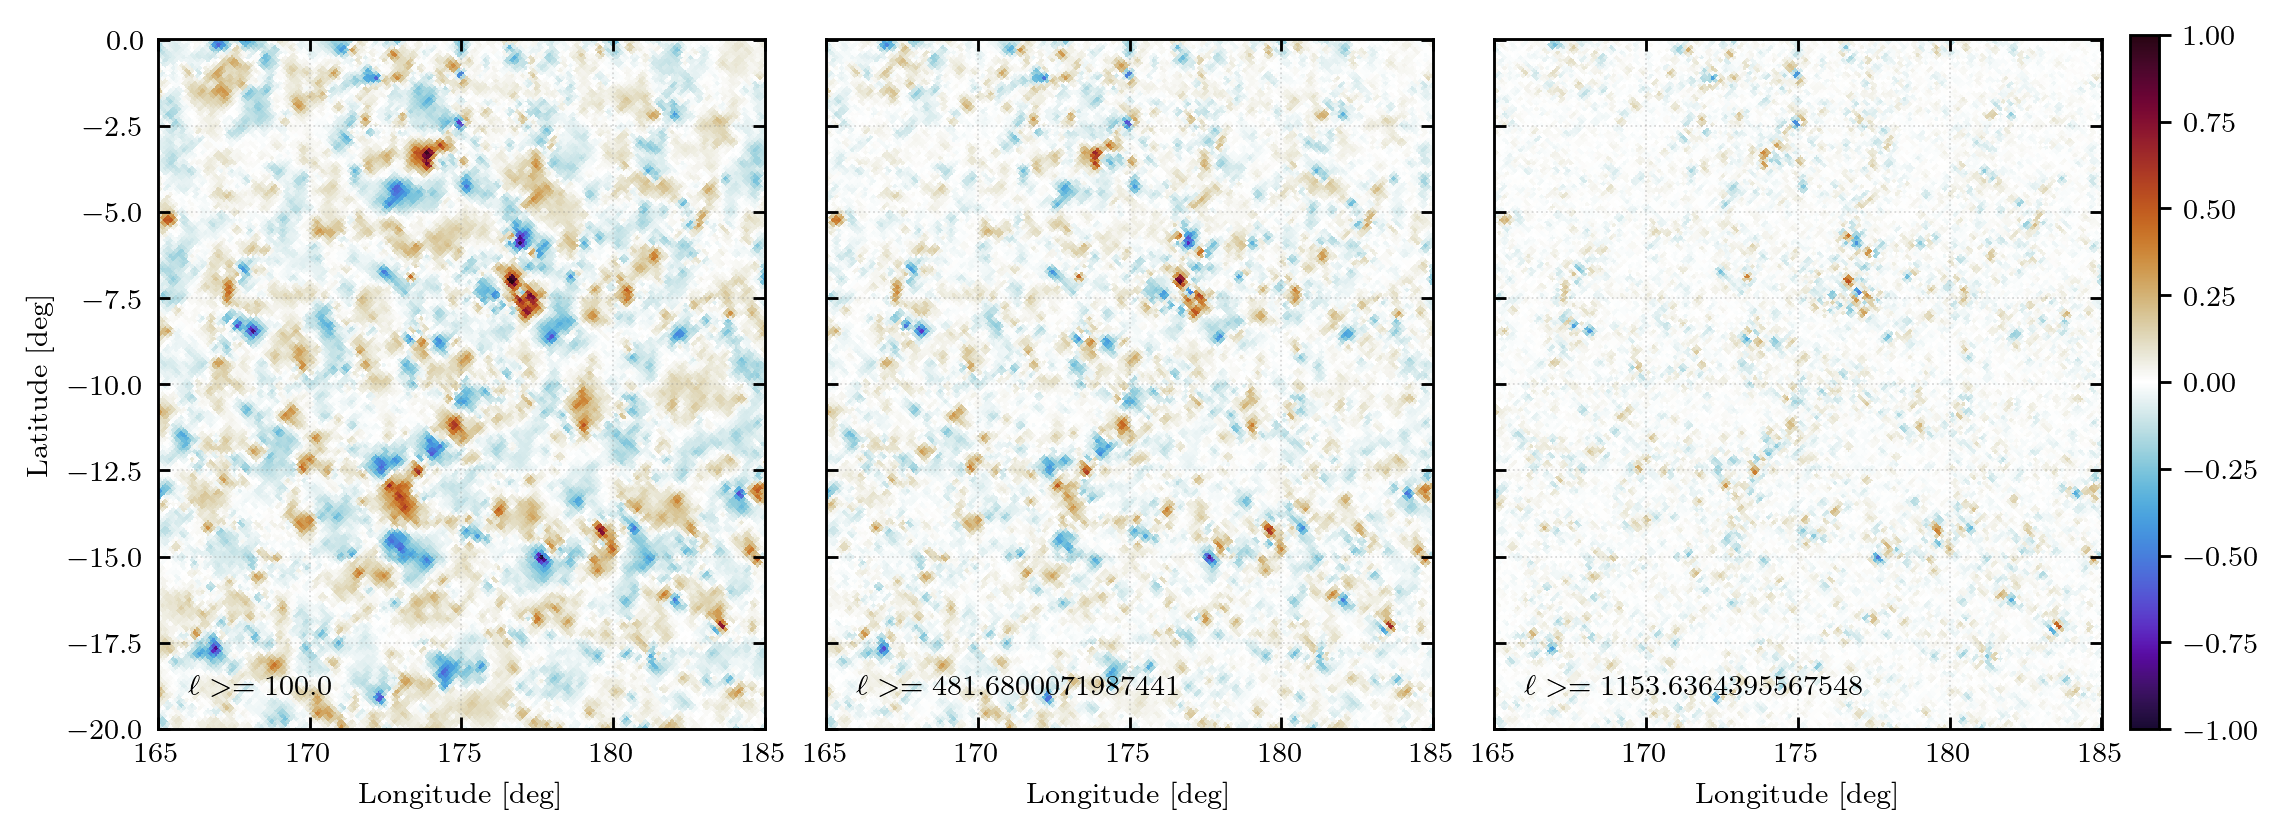

In [86]:

xsize = 1024
ysize = xsize

lon = np.linspace(165, 185, xsize)
lat = np.linspace(-20, 0, ysize)

fig, ax = plt.subplots(1, 3, figsize=(3.75*3., 3.5), dpi=256)

cols = ax[0].pcolormesh(lon, lat, im1, cmap=cmr.fusion_r, vmin=-1, vmax=1)
ax[1].pcolormesh(lon, lat, im2, cmap=cmr.fusion_r, vmin=-1, vmax=1)
ax[2].pcolormesh(lon, lat, im3, cmap=cmr.fusion_r, vmin=-1, vmax=1)

fig.subplots_adjust(right=0.8)
cbar_ax = fig.add_axes([0.81, 0.11, 0.01, 0.775])
fig.colorbar(cols, cax=cbar_ax)
# cbar_ax.set_title(r'$\mu \mathrm{K}_{\mathrm{CMB}}$')

for axx in ax:
    pretty_axes(axx)
ax[1].set_yticklabels([])
ax[2].set_yticklabels([])

ax[0].set_ylabel('Latitude [deg]')
ax[0].set_xlabel('Longitude [deg]')
ax[1].set_xlabel('Longitude [deg]')
ax[2].set_xlabel('Longitude [deg]')

ax[0].text(0.05, 0.05, '$\ell >= %s$' % filters_ell[0], transform=ax[0].transAxes, color='black')
ax[1].text(0.05, 0.05, '$\ell >= %s$' % filters_ell[18], transform=ax[1].transAxes, color='black')
ax[2].text(0.05, 0.05, '$\ell >= %s$' % filters_ell[-2], transform=ax[2].transAxes, color='black')

fig.subplots_adjust(wspace=0.1)

fig.savefig('scale_filter_example_cuts.png', bbox_inches='tight', pad_inches=0.1)


In [63]:
e_sfs = []
# b_sfs = []
e_sfs.append(make_sf(eb11[0], filters_fwhm))
for eb in ebs:
    e_sfs.append(make_sf(eb[0], filters_fwhm))
#     b_sfs.append(make_sf(eb[1], filters_fwhm))

In [64]:
e_moms = []
for i, e in enumerate(e_sfs):
    e_moms.append([make_mom(e, p=3, norm=None), make_mom(e, p=4, norm=None), make_mom(e, p=5, norm=None), make_mom(e, p=6, norm=None)])

<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:57: SyntaxWarning: invalid escape sequence '\m'
<>:56: SyntaxWarning: invalid escape sequence '\m'
<>:57: SyntaxWarning: invalid escape sequence '\m'
/tmp/ipykernel_37794/2132801584.py:56: SyntaxWarning: invalid escape sequence '\m'
  ax[2].text(0.1, 0.8, '$5^{\mathrm{th}}$ moment', transform=ax[2].transAxes)
/tmp/ipykernel_37794/2132801584.py:57: SyntaxWarning: invalid escape sequence '\m'
  ax[3].text(0.1, 0.8, '$6^{\mathrm{th}}$ moment', transform=ax[3].transAxes)


[0 1 2 3 4 5 6]
[0.5 1.5 2.5 3.5 4.5 5.5]
[0.0, 0.01, 0.1, 0.25, 0.5, 0.75]


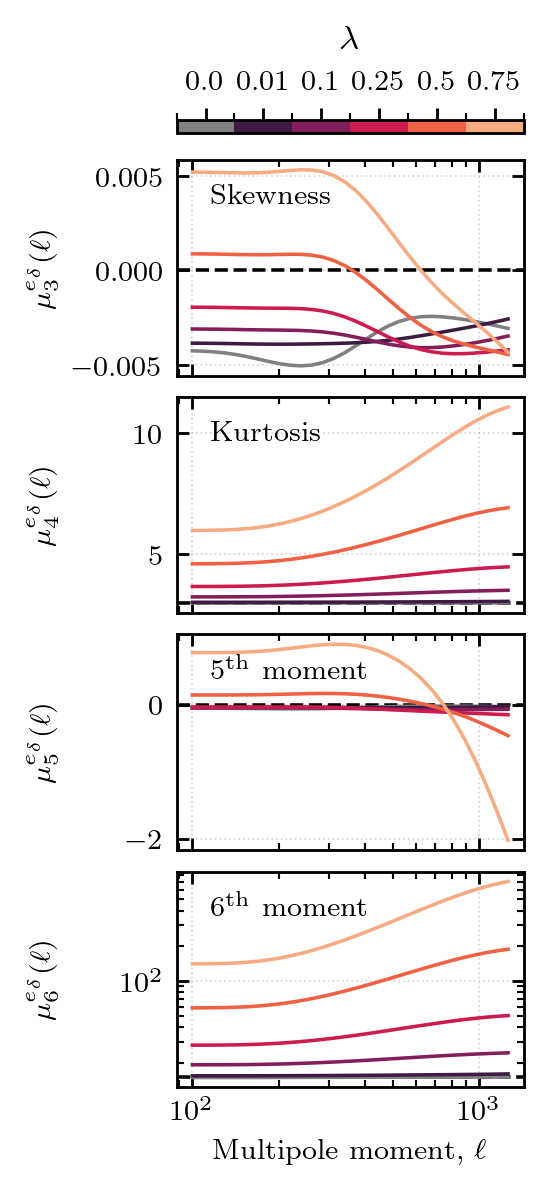

In [65]:

fig, ax = plt.subplots(4, 1, figsize=(1.75, 1.75*3.), dpi=256)

cols = sns.color_palette('rocket', len(e_moms)-1)
from matplotlib.colors import ListedColormap, BoundaryNorm
colours = [(0.5, 0.5, 0.5)] + cols
cmap2 = ListedColormap(colours)

for i, t in enumerate(e_moms):
    ax[0].plot(filters_ell, t[0], linestyle='-', color=colours[i], linewidth=1., zorder=5)
    ax[1].plot(filters_ell, t[1], linestyle='-', color=colours[i], linewidth=1., zorder=5)
    ax[2].plot(filters_ell, t[2], linestyle='-', color=colours[i], linewidth=1., zorder=5)
    ax[3].plot(filters_ell, t[3], linestyle='-', color=colours[i], linewidth=1., zorder=5)

for axx in ax:
    pretty_axes(axx)
    axx.set_xscale('log')
    # axx.loglog()

ax[0].axhline(0., linestyle='--', color='black', linewidth=1., zorder=3)
ax[1].axhline(3., linestyle='--', color='black', linewidth=1., zorder=3)
ax[2].axhline(0., linestyle='--', color='black', linewidth=1., zorder=3)
ax[3].axhline(15., linestyle='--', color='black', linewidth=1., zorder=3)
ax[3].set_yscale('log')

ax[0].set_xticklabels([])
ax[1].set_xticklabels([])
ax[2].set_xticklabels([])

from matplotlib.colors import ListedColormap, BoundaryNorm
# colours = [(0.5, 0.5, 0.5)] + cols
cmap2 = ListedColormap(colours)

bounds = np.arange(len(colours) + 1)
print(bounds)
norm = BoundaryNorm(bounds, ncolors=len(colours))
im = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
fig.subplots_adjust(top=0.8)
cbar_ax = fig.add_axes([0.125, 0.82, 0.775, 0.01])
cbar = fig.colorbar(im, cax=cbar_ax, orientation='horizontal')
centers = 0.5 + np.arange(len(colours))
print(centers)
cbar.set_ticks(centers)
print([0.,] + Hs)
cbar.set_ticklabels([0.,] + Hs)
cbar.ax.xaxis.set_ticks_position('top')
cbar_ax.set_title(r'$\lambda$')

ax[0].set_ylabel(r'$\mu^{e_\delta}_{3}(\ell)$')
ax[1].set_ylabel(r'$\mu^{e_\delta}_{4}(\ell)$')
ax[2].set_ylabel(r'$\mu^{e_\delta}_{5}(\ell)$')
ax[3].set_ylabel(r'$\mu^{e_\delta}_{6}(\ell)$')
ax[3].set_xlabel(r'Multipole moment, $\ell$')

ax[0].text(0.1, 0.8, 'Skewness', transform=ax[0].transAxes)
ax[1].text(0.1, 0.8, 'Kurtosis', transform=ax[1].transAxes)
ax[2].text(0.1, 0.8, '$5^{\mathrm{th}}$ moment', transform=ax[2].transAxes)
ax[3].text(0.1, 0.8, '$6^{\mathrm{th}}$ moment', transform=ax[3].transAxes)

fig.align_ylabels()

fig.subplots_adjust(hspace=0.1)

fig.savefig('edelta_stat_moment.png', pad_inches=0.1, bbox_inches='tight')
